In [2]:
import cv2
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
IN_FOLDER = r'/mnt/d/DataSets/Images/Fountain/vid_export'

In [4]:
def get_variance(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance = cv2.Laplacian(gray, cv2.CV_64F).var()
    return variance

In [5]:
img_data = []
variances = []
for f in tqdm(os.listdir(IN_FOLDER), desc="Processing Images"):
    if f.endswith('.jpg') or f.endswith(".png"):
        variance = get_variance(os.path.join(IN_FOLDER, f))
        img_data.append((f, variance))
        variances.append(variance)

Processing Images:   0%|          | 0/1703 [00:00<?, ?it/s]

Processing Images: 100%|██████████| 1703/1703 [04:08<00:00,  6.85it/s]


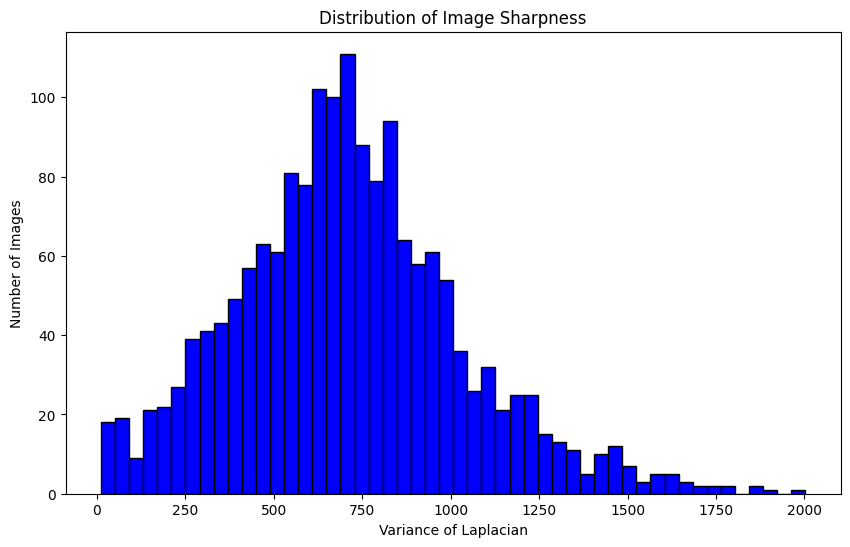

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(variances, bins=50, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Image Sharpness')
plt.xlabel('Variance of Laplacian')
plt.ylabel('Number of Images')

# Showing the plot
plt.show()

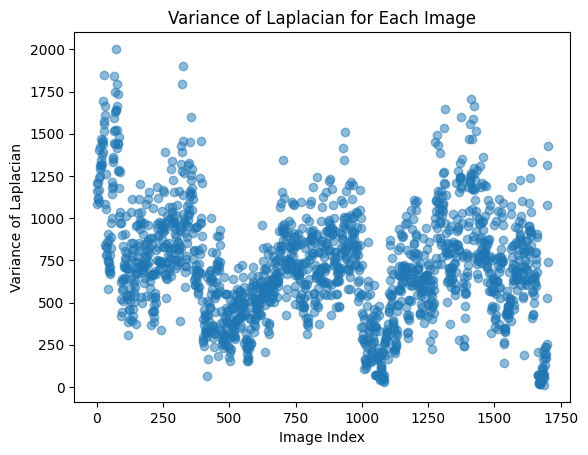

In [7]:
# Scatter plot of the variances
plt.scatter(range(len(variances)), variances, alpha=0.5)

# Adding titles and labels
plt.title('Variance of Laplacian for Each Image')
plt.xlabel('Image Index')
plt.ylabel('Variance of Laplacian')

# Showing the plot
plt.show()


In [10]:
#get the top 10 blurry images
img_data.sort(key=lambda x: x[1])
print("Top 10 Blurry Images:")
for i in range(10):
    print(img_data[i])
    # image = cv2.imread(os.path.join(IN_FOLDER, img_data[i][0]))
    # cv2.imshow("Blurry Image", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

Top 10 Blurry Images:
('vid_export1689.png', 11.60651099083785)
('vid_export1673.png', 14.594335948331857)
('vid_export1672.png', 15.857750193958022)
('vid_export1671.png', 19.26836223236606)
('vid_export1669.png', 22.531722739817276)
('vid_export1675.png', 27.738467088902322)
('vid_export1678.png', 28.357372335858457)
('vid_export1674.png', 29.615601254988302)
('vid_export1670.png', 29.954193000948354)
('vid_export1084.png', 30.027039566609826)


In [11]:
#get the median variance
median_variance = np.median(variances)
print("Median Variance of Laplacian: ", median_variance)
#list the top 10 images just below the median variance
print("Top 10 Images Just Below the Median Variance:")
for i in range(len(img_data)-1, 0, -1):
    if img_data[i][1] < median_variance:
        print(img_data[i])
        # image = cv2.imread(os.path.join(IN_FOLDER, img_data[i][0]))
        # cv2.imshow("Image Just Below Median Variance", image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

Median Variance of Laplacian:  698.1060169836725
Top 10 Images Just Below the Median Variance:
('vid_export0827.png', 697.8662993281558)
('vid_export0847.png', 697.4125413532023)
('vid_export0728.png', 697.3436043564387)
('vid_export0238.png', 696.6782634603028)
('vid_export1213.png', 695.9082366927587)
('vid_export0175.png', 695.4041945148988)
('vid_export0236.png', 695.3804675262745)
('vid_export0460.png', 695.1797309013251)
('vid_export1625.png', 694.5646034054887)
('vid_export1624.png', 693.6779164008876)
('vid_export0640.png', 693.5531490936313)
('vid_export0913.png', 693.0200440986505)
('vid_export0379.png', 692.4158728419341)
('vid_export1275.png', 692.1587224286844)
('vid_export1337.png', 691.670364649855)
('vid_export0364.png', 691.1578034537276)
('vid_export1110.png', 691.0961091239573)
('vid_export0431.png', 691.0724617811077)
('vid_export1581.png', 690.5688642445558)
('vid_export0991.png', 689.7949058715368)
('vid_export0374.png', 689.3762080914807)
('vid_export0844.png', 6

In [13]:
#how many images are above and below the median variance
above = len([variance for variance in variances if variance > median_variance])
below = len([variance for variance in variances if variance < median_variance])
print("Number of Images Above Median Variance: ", above)
print("Number of Images Below Median Variance: ", below)

Number of Images Above Median Variance:  851
Number of Images Below Median Variance:  851


In [15]:
#how many images are above and below the mean variance
mean_variance = np.mean(variances)
above = len([variance for variance in variances if variance > mean_variance])
below = len([variance for variance in variances if variance < mean_variance])
print("Number of Images Above Mean Variance: ", above)
print("Number of Images Below Mean Variance: ", below)

Number of Images Above Mean Variance:  799
Number of Images Below Mean Variance:  904


In [16]:
#list top 10 sharpest images
print("Top 10 Sharpest Images:")
for i in range(len(img_data)-1, len(img_data)-11, -1):
    print(img_data[i])
    # image = cv2.imread(os.path.join(IN_FOLDER, img_data[i][0]))
    # cv2.imshow("Sharpest Image", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

Top 10 Sharpest Images:
('vid_export0073.png', 2002.8312684208618)
('vid_export0325.png', 1899.1468320903073)
('vid_export0029.png', 1848.34555202141)
('vid_export0065.png', 1844.422063658702)
('vid_export0321.png', 1795.979297224957)
('vid_export0077.png', 1795.0108426609327)
('vid_export0069.png', 1744.7173769828187)
('vid_export0081.png', 1732.851567400172)
('vid_export1414.png', 1703.7520910854755)
('vid_export0025.png', 1695.5560841595595)


In [17]:
#list the top 10 images just below the mean variance
print("Top 10 Images Just Below the Mean Variance:")
for i in range(len(img_data)-1, 0, -1):
    if img_data[i][1] < mean_variance:
        print(img_data[i])
        # image = cv2.imread(os.path.join(IN_FOLDER, img_data[i][0]))
        # cv2.imshow("Image Just Below Mean Variance", image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

Top 10 Images Just Below the Mean Variance:
('vid_export0589.png', 711.9449753324193)
('vid_export1601.png', 711.8662622496283)
('vid_export0911.png', 711.7142567123366)
('vid_export0861.png', 711.1694620215195)
('vid_export0759.png', 711.1243887889217)
('vid_export0104.png', 710.9868682446466)
('vid_export0992.png', 710.8414609349842)
('vid_export1153.png', 710.448809791337)
('vid_export1211.png', 710.286608349503)
('vid_export1168.png', 709.8299112653871)
('vid_export0106.png', 709.2299459930086)
('vid_export0154.png', 709.1165123451874)
('vid_export1184.png', 708.9447355477525)
('vid_export0051.png', 708.3422020758755)
('vid_export0681.png', 707.8288360263033)
('vid_export0178.png', 707.7560372478827)
('vid_export0152.png', 707.4252215817107)
('vid_export1475.png', 707.243864214136)
('vid_export1328.png', 707.2098726476017)
('vid_export0866.png', 707.0224708174087)
('vid_export1342.png', 706.9197306655352)
('vid_export0117.png', 706.0385689781326)
('vid_export0846.png', 705.98851968

In [38]:
def get_subject_to_center_offset(img_path, low_color_bounds, high_color_bounds):
    image = cv2.imread(img_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, low_color_bounds, high_color_bounds)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
      # Find the largest contour assumed to be the subject
      largest_contour = max(contours, key=cv2.contourArea)
      # Calculate the center of the contour
      M = cv2.moments(largest_contour)
      if M["m00"] != 0:
          cx = int(M["m10"] / M["m00"])
          cy = int(M["m01"] / M["m00"])
      else:
          cx, cy = 0, 0
      
      # Determine the center of the image
      height, width = image.shape[:2]
      center_image = (width // 2, height // 2)

      # Return the offset of the subject from the center of the image
      return np.array([cx - center_image[0], cy - center_image[1]])

In [40]:
low_bounds = np.array([4, 0, 143])
high_bounds = np.array([70, 57, 233])
img_offset_data = []
offsets = []
for f in tqdm(os.listdir(IN_FOLDER), desc="Processing Images"):
    if f.endswith('.jpg') or f.endswith(".png"):
        offset = get_subject_to_center_offset(os.path.join(IN_FOLDER, f),low_bounds, high_bounds)
        img_offset_data.append((f, offset))
        offsets.append(offset)

Processing Images: 100%|██████████| 1703/1703 [04:07<00:00,  6.89it/s]


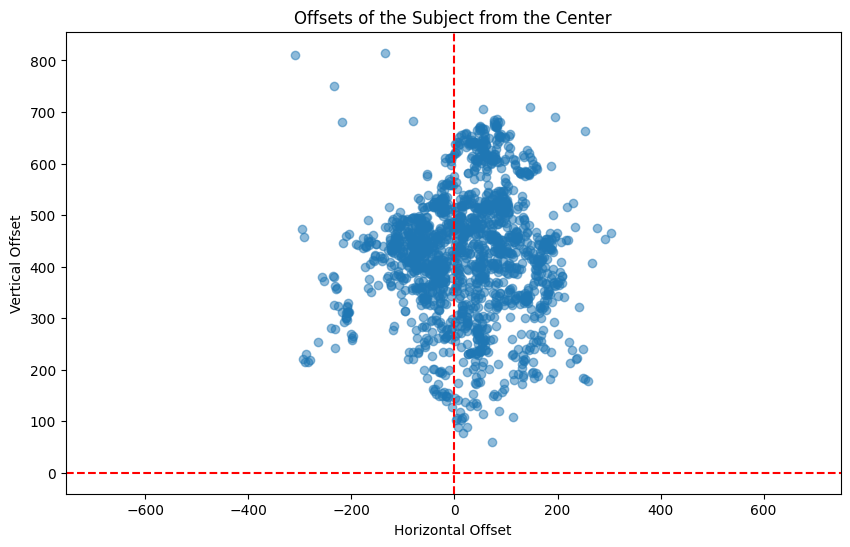

In [42]:
offsets_array = np.array(offsets)
plt.figure(figsize=(10, 6))
plt.scatter(offsets_array[:, 0], offsets_array[:, 1], alpha=0.5)
plt.title('Offsets of the Subject from the Center')
plt.xlabel('Horizontal Offset')
plt.ylabel('Vertical Offset')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.axis('equal')
plt.show()

In [44]:
#get the average offset
average_offset = np.mean(offsets_array, axis=0)
average_offset

array([ 19.73987082, 423.33118027])

In [ ]:
#get 5 images around the average offset
print("Images Around the Average Offset:")
for i in range(len(img_offset_data)):
    offset = img_offset_data[i][1]
    if np.allclose(offset, average_offset, atol=50):
        print(img_offset_data[i][0])
        # image = cv2.imread(os.path.join(IN_FOLDER, img_offset_data[i][0]))
        # cv2.imshow("Image Around Average Offset", image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

In [46]:
#get the top 5 images with the largest offset
img_offset_data.sort(key=lambda x: np.linalg.norm(x[1]))
print("Top 5 Images with Largest Offset:")
for i in range(len(img_offset_data)-1, len(img_offset_data)-6, -1):
    print(img_offset_data[i][0])
    # image = cv2.imread(os.path.join(IN_FOLDER, img_offset_data[i][0]))
    # cv2.imshow("Image with Largest Offset", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

Top 5 Images with Largest Offset:
vid_export1674.png
vid_export1675.png
vid_export1673.png
vid_export1670.png
vid_export1669.png


In [54]:
#set the offset threshold for the offset by 12 standard deviations below the mean
offset_threshold = np.std(offsets_array, axis=0)
offset_threshold

array([ 95.76564712, 118.49344763])

In [55]:
#set the variance threshold by 2 standard deviations below the mean
variance_threshold = 1 * np.std(variances)
variance_threshold

321.64258910147913

In [56]:
#filter out images with offsets greater than the threshold and variance less than the threshold
filtered_img_data = []
for i in range(len(img_data)):
    if np.linalg.norm(offsets[i]) > np.linalg.norm(offset_threshold) and variances[i] < variance_threshold:
        filtered_img_data.append(img_data[i])


In [57]:
#now copy the filtered images to a new folder
OUT_FOLDER = r'/mnt/d/DataSets/Images/Fountain/filtered_images'
if not os.path.exists(OUT_FOLDER):
    os.makedirs(OUT_FOLDER)

for img in filtered_img_data:
    img_path = os.path.join(IN_FOLDER, img[0])
    out_path = os.path.join(OUT_FOLDER, img[0])
    os.system(f'cp {img_path} {out_path}')